### Analyzing the Stroop Effect


(1) What is the independent variable? What is the dependent variable?

-  __Independent Variable__ : By definition independent variable is a regressor, and in this case that will be the ___congurent or incongurent word condition___. <br>
-  __Dependent Variable__ : By definition dependent variable is output/outcome whose variation is being studied. So in this case ___Measured Time___ is the dependent variable.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

##### Setting Hypothesis

$$ H_0:  \mu_{incong} = \mu_{cong} $$ <br>
$$ H_1: \mu_{incong} \neq \mu_{cong}$$


- __H0(Null Hypothesis)__: ___Response time___ between  incongurant and congurant words is ___same___. <br>
- __H1(Alternative Hypothesis)__: ___Response time___ between  incongurant and congurant words is ___not the same___.
-  __$μ_{incong}$__ : Population mean of Incongruent words response time
-  __$μ_{cong}$__ : Population mean of Congruent words response time

##### Test Selection
-  __z-test__:If the population standard deviation, σ, is known and either the data is normally distributed or the sample size n > 30, we use the normal distribution (z-statistic). , but in our case ___sample size is small (24)___. Hence this is ___not a good option___

-  __t-test__: When the population standard deviation, σ, is unknown and either the data is normally distributed or the sample size is greater than 30 (n > 30), we use the t-distribution (t-statistic). which is inline with our case. Hence this is ___a good option___

- __f-test__: Unlike z and t-test, f-test is used to find out variance of two populations.


Based on this selected hypothesis and test selection considerations, I will use the dependent __t-test__ method for this analysis.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
%matplotlib inline

In [2]:
# setting parameters for seaborn charts
sns.set(context='notebook', style='darkgrid',color_codes = True)

In [3]:
# Importing data and checking header
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [4]:
#Statistic summary of Congurent and Incongurent condition
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


##### Observations: <br>
-  __Mean__ of Incongruent condition is higher that Congruent condition
-  __Standard deviation__ is also higher for Incongurent indicating that distribution maybe wider in this case compared to Congurent condition.


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

C:\Users\HThakur\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\HThakur\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


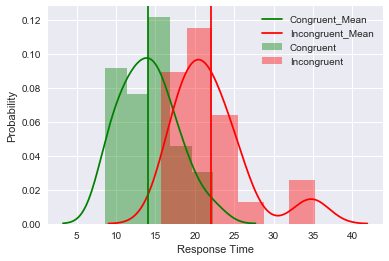

In [5]:
#Calculating Mean for each condition
cong_mean = df['Congruent'].mean()
incong_mean = df['Incongruent'].mean()

#Assigning data to charts
ax = sns.distplot( df["Congruent"] , color="green", label="Congruent");
ax = sns.distplot( df["Incongruent"] , color="red", label="Incongruent");

#plotting vertical line for mean
plt.axvline(x = cong_mean, label = "Congruent_Mean", color = "green");
plt.axvline(x = incong_mean, label = "Incongruent_Mean",color="red");

#setting labels
ax.set(xlabel='Response Time', ylabel='Probability')
plt.legend();



##### Observations: <br>
-  Distribution curve is depicting that the for majority of cases response time is higher with Incongruent condition compared to Congruent condition. (overlap is small and as concluded before, mean is higher).
-  Possible outlier for Incongruent data (towards higher response time)
-  Mean value is closer to peak, hence 

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [6]:
#Calculating difference in means
diff_mean = incong_mean - cong_mean
print ("Difference in mean of Incongruent and congruent condition :",diff_mean)

#Calculating difference in values and adding the column
df['diff_value'] = df['Incongruent']- df['Congruent']

#Calculating standard deviation in difference values
std_diff_value = df['diff_value'].std()
print ("Standard deviation of difference in values :",std_diff_value)

# Calculating t-critical value with confidence interval 95%
sample_size = len(df)
deg_free = sample_size -1
ci = 0.95
crit_t = stats.t.ppf(ci,deg_free)

print ("t-critical value for this test is:",crit_t)

Difference in mean of Incongruent and congruent condition : 7.964791666666665
Standard deviation of difference in values : 4.864826910359056
t-critical value for this test is: 1.71387152775


In [7]:
#Calculating t-statistic

t = diff_mean/(std_diff_value/math.sqrt(sample_size))
print ("t-statistic value for this test is:",t)

t-statistic value for this test is: 8.020706944109955


In [8]:
stats.t.cdf(t,df=deg_free)

0.99999997948499708

In [9]:
#Calculating Confidence Intervals

ci_upper = diff_mean + crit_t *(std_diff_value/math.sqrt(sample_size))
ci_lower = diff_mean - crit_t *(std_diff_value/math.sqrt(sample_size))
print ("Upper boud of CI is:",ci_upper)                           
print ("Lower boud of CI is:",ci_lower)                                

Upper boud of CI is: 9.66671517005
Lower boud of CI is: 6.26286816328


##### Observations: <br>
-  Since the calculated t-statistic (8.02) is higher than t-critical (1.71), we can __reject the null hypothesis__.
-  95% confidence interval bounds are __(9.7 , 6.2)__. Which indicates that __it takes minimum 6.2 sec more for Incongruent task__ compared to congruent one.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

##### Research Findings: <br>
-  2 theories may explain the stroop effect:
    -  __Speed of Processing__ : Tendancy to read words faster than actually observing the colors.
    -  __Selective Attention Theory__ : Interference between named colors and the actual colors.
-  Other application (variation) of similar test is __Emotional Stroop test__. Where emotional and nuteral words are used instead of color coding in original Stroop experiment.
-  Per my understanding application of this test is mainly focused on __Cognitive neuropsychology__, which aims to understand how brain reacts to psychological processes.

### Reference 
-  Dependent and Independent Variables: https://en.wikipedia.org/wiki/Dependent_and_independent_variables
-  kwarg Error Message: https://github.com/MichaelGrupp/evo/issues/28
-  t-test theory: https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f
-  Stroop effect: https://imotions.com/blog/the-stroop-effect/
-  Emotional Stroop test: https://en.wikipedia.org/wiki/Emotional_Stroop_test
-  Cognitive neuropsychology: https://en.wikipedia.org/wiki/Cognitive_neuropsychology
-  Selecting Hypothesis test: http://cfcc.edu/faculty/cmoore/0801-HypothesisTests.pdf
